# ELEN3007 ICAO-Codes-Weather-analysis

##### This Script imports the weather data for the Chulman Airport (UELL) weather station, in Russia

In [222]:
import numpy as np
import seaborn as sns

from pandas import Series
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

import json
import csv
import scipy.stats
import matplotlib.pyplot as plt
from IPython.display import HTML, display

plt.rcParams['figure.figsize'] = (16,6)

First, define some useful functions

In [108]:
def printMatrix(data): #used to print matricies to HTML
    display(HTML(
        '<table><tr>{}</tr></table>'.format(
            '</tr><tr>'.join(
                '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
            )
    ))
    
def printText(text):
    display(HTML('<p>'+text+'<p>'))

def displayHTML(html):
    display(HTML(html))

##Question 1 
Import data from text files. These are stored as csvs in the "Data" directory in the repo. This CSV is formatted as: {Unit Timestamp, max Temp, avg Temp, min Temp}. Each CSV is read into a matrix. These matricies are then added to a vector so they can be itterated through later on

In [6]:
w1995 = np.genfromtxt('Data/1995.csv', delimiter=',')
w2000 = np.genfromtxt('Data/2000.csv', delimiter=',')
w2005 = np.genfromtxt('Data/2005.csv', delimiter=',')
w2010 = np.genfromtxt('Data/2010.csv', delimiter=',')
w2015 = np.genfromtxt('Data/2015.csv', delimiter=',')

weatherData=[w1995,w2000,w2005,w2010,w2015]

##Question 2
Next, identify the minimum, maximum, mean and standard deviation for each year. As the matricies are in a vector, we can do this sequentially in a loop. These outputs are produced in a matrix, where the columns are the years (1995,2000,2005,2010,2015) and the rows are the minimum, maximum, mean and standard deviation for each year. This can be seen in the table below:


In [115]:
dataValues=np.zeros((4,5))
counter = 0;
for year in weatherData:
    dataValues[0,counter]=year[:,1].max() #max of max values
    dataValues[1,counter]=year[:,3].min() #min of min values
    dataValues[2,counter]=round(year[:,2].mean(), 2) #average of average values
    dataValues[3,counter]=round(year[:,2].std(), 2) #Standard deviation of average values
    counter=counter+1;
# printMatrix(dataValues)

displayHTML(pd.DataFrame(dataValues, columns=['1995','2000','2005','2010','2015'],index=['Minimum','Maximum','Mean','Standard Deviation']).to_html())

,1995,2000,2005,2010,2015
Minimum,29.00,37.00,30.00,28.00,33.00
Maximum,-45.00,-45.00,-41.00,-45.00,-42.00
Mean,-6.65,-6.83,-6.39,-6.83,-5.43
Standard Deviation,18.01,16.56,17.08,18.10,16.53


##Question 3
Each Years probability distribution functions are now plotted, for each year, on the same set of axes. To achive this, a fixed plot of univariate distributions is generated. This is done with the Seaborn displot function


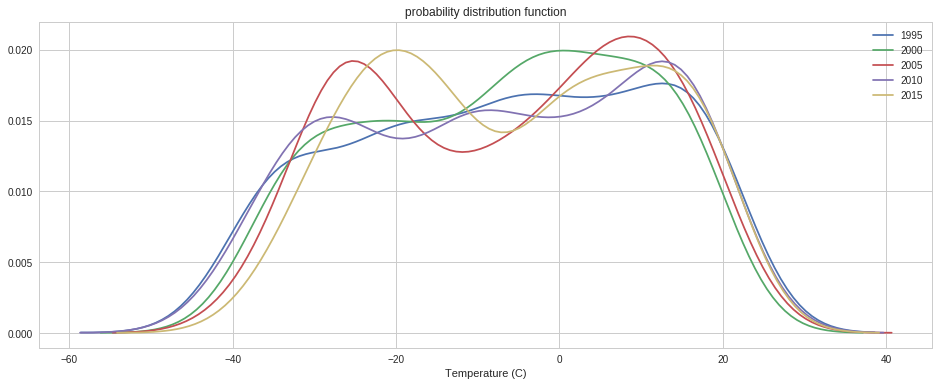

In [226]:
sns.set_style('whitegrid')
counter =0;
for year in weatherData:
    sns.distplot(year[:,2], hist=False,
                 label=1995+counter*5, #count the current year, from the first dataset in 1995
                 axlabel="Temperature (C)")
    counter=counter+1;
plt.title('probability distribution function')
plt.show()

## Question 4
The cross-correlation between each year’s annual temperatures is now calculated. This is shown as a matrix output
Note here that we are slicing the data on each year to ignore the leap year in 2000. This is done as the correlation needs matricies of the same dimension.

Additionally note that we need to normalise the data. This is the same as using the numpy corrfoef function

In [137]:
autoCorrelation = np.zeros((5, 5))
for x in range(0, 5):
    for y in range(0, 5):
        a = weatherData[x][0:365, 2]
        b = weatherData[y][0:365, 2]
        a = (a - np.mean(a)) / (np.std(a) * len(a))
        b = (b - np.mean(b)) / (np.std(b))
        autoCorrelation[x, y] = np.correlate(a, b)
displayHTML(pd.DataFrame(autoCorrelation, columns=['1995', '2000', '2005', '2010', '2015'],
                         index=['1995', '2000', '2005', '2010', '2015']).to_html())


,1995,2000,2005,2010,2015
1995,1.000000,0.918720,0.918722,0.940312,0.922096
2000,0.918720,1.000000,0.917592,0.921972,0.925752
2005,0.918722,0.917592,1.000000,0.940042,0.932908
2010,0.940312,0.921972,0.940042,1.000000,0.933412
2015,0.922096,0.925752,0.932908,0.933412,1.000000


## Question 5
The autocorrelation function for each year’s data, where τ ranges from 0 to 364 is now generated.

Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.

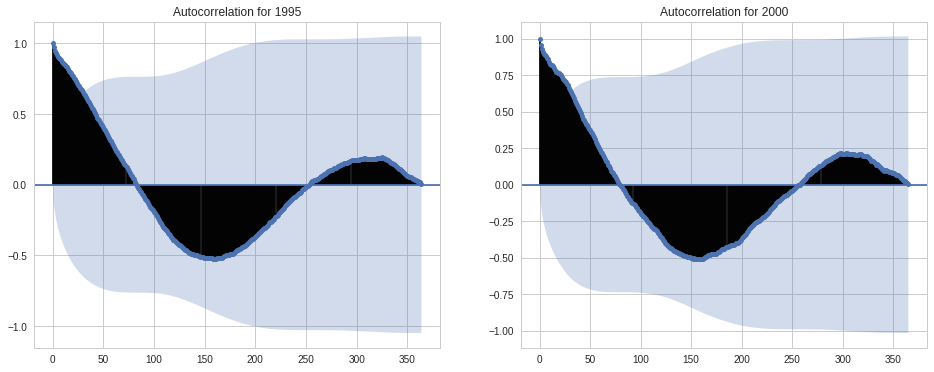

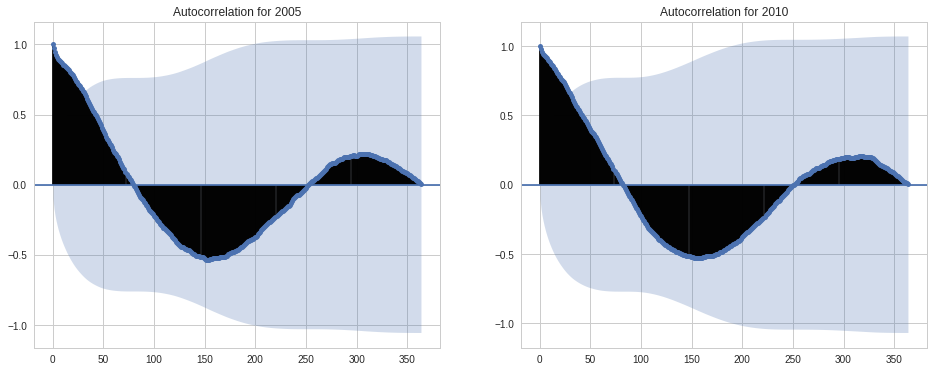

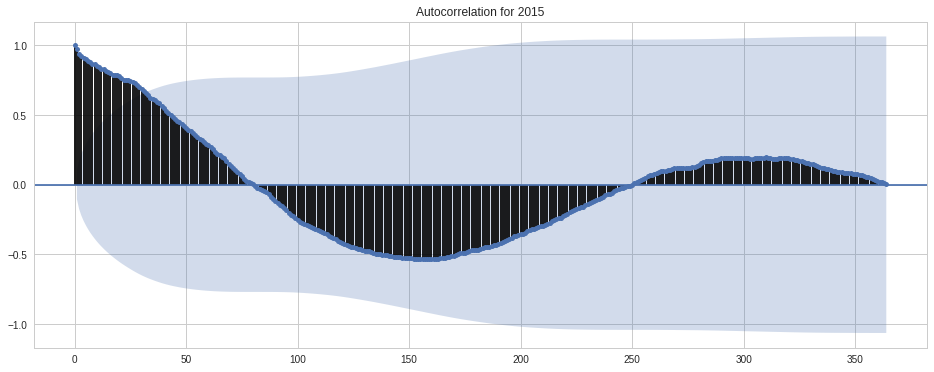

In [223]:
counter=0;

for year in weatherData:
    
    if (counter==0): #on the first loop, generate the subplots
        fig, axs = plt.subplots(1,2)
    
    if counter==4: # if we are at the last figure, we want it to be on its own line
        plot_acf(year[:,2],title="Autocorrelation for {}".format(1995+5*counter))
        plt.show()
    else:
        plot_acf(year[:,2],title="Autocorrelation for {}".format(1995+5*counter), ax=axs[counter%2])
    if counter%2==1: # every two figures, we need to generate a new row
        plt.show()
        if(counter<2): #a new sub plot is needed on second row
            fig, axs = plt.subplots(1,2)
    counter=counter+1;
    

## Question 6
Next, each year, temp is broken down into subdevisions in the range:
$$[minimum-0.1=t_0,maximum+0.1=t_10]$$
into ten equal intervals. Then, 10 intervals are generate